Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

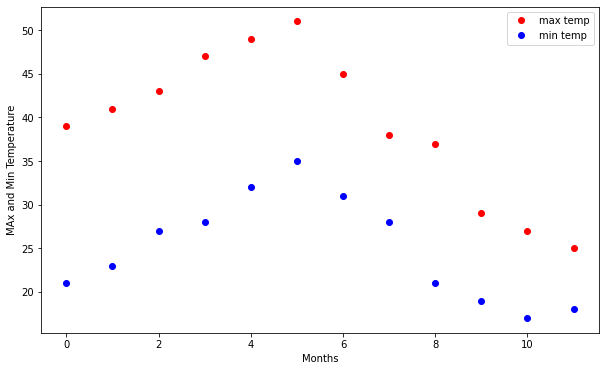

In [14]:
# Data
import numpy as np
import matplotlib.pyplot as plt
data_max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
data_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months=np.arange(0,12)

plt.figure(figsize=(10,6))
plt.plot(months,data_max,'ro')
plt.plot(months,data_min,'bo')
plt.xlabel('Months')
plt.ylabel('MAx and Min Temperature')
plt.legend(['max temp','min temp'],loc=1)
plt.show()

In [35]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
opt_max, cov_max = optimize.curve_fit(yearly_temps, months,data_max)
opt_min, cov_min = optimize.curve_fit(yearly_temps, months,data_min)

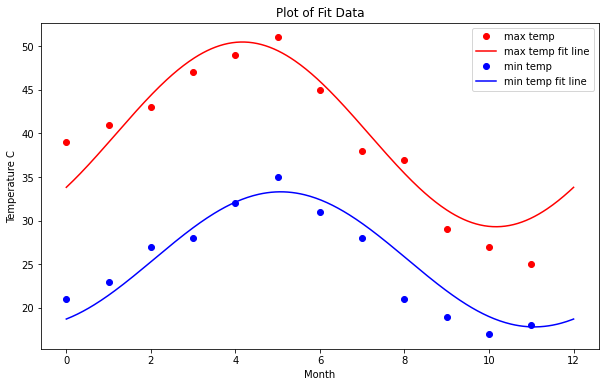

In [123]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(10,6))
plt.plot(months, data_max, 'ro')
plt.plot(days, yearly_temps(days, *opt_max), 'r-')
plt.plot(months, data_min, 'bo')
plt.plot(days, yearly_temps(days, *opt_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature C')

plt.legend(['max temp','max temp fit line','min temp','min temp fit line'],loc=1)
plt.show()

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [119]:
import pandas as pd
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv" 
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


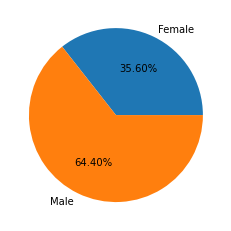

In [101]:
#1.Create a pie chart presenting the male/female proportion
a=titanic.groupby('sex').pclass.count()
l=['Female','Male']
plt.pie(a,labels=l,autopct='%.2f%%')
plt.show()

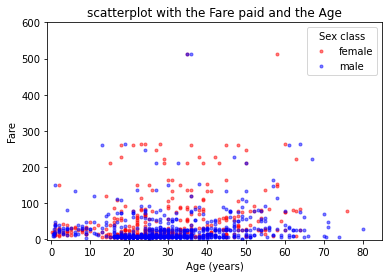

In [142]:
#2.Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
titanic_fig, titanic_sex_ax = plt.subplots()
color=['red','blue']

count = 0
for name, group in titanic.groupby('sex'):
    titanic_sex_ax.plot(group.age, group.fare, '.', 
                           label = name, alpha = 0.5, 
                           c = color[count])
    count += 1

titanic_sex_ax.legend(title = "Sex class", fontsize = 10,numpoints=1)
plt.xlabel('Age (years)')
plt.ylabel('Fare')
titanic_sex_ax.set_xlim(-1, 85)
titanic_sex_ax.set_ylim(-1, 600)
plt.title("scatterplot with the Fare paid and the Age")
plt.show(titanic_fig)